# Individual Exercise

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("schools_combined.csv")

**Let's practice creating plots! Try replicating the following images:**

1. Number of enrolled students per region arranged alphabetically

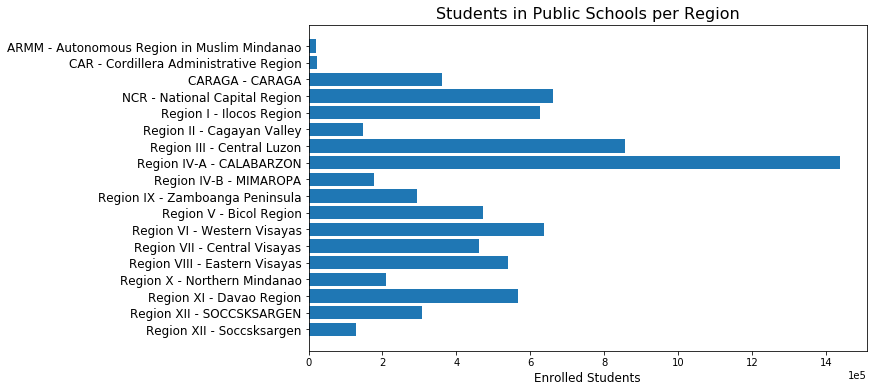

*Hint: figsize=10,6; axis labels fontsize=12; title fontsize=16*

In [89]:
region = df.groupby("region")["enrollment"].sum()
region

region
ARMM - Autonomous Region in Muslim Mindanao      20280
CAR - Cordillera Administrative Region           23862
CARAGA - CARAGA                                 360762
NCR - National Capital Region                   661271
Region I - Ilocos Region                        627172
Region II - Cagayan Valley                      146245
Region III - Central Luzon                      855092
Region IV-A - CALABARZON                       1438092
Region IV-B - MIMAROPA                          178360
Region IX - Zamboanga Peninsula                 294390
Region V - Bicol Region                         471705
Region VI - Western Visayas                     635880
Region VII - Central Visayas                    460345
Region VIII - Eastern Visayas                   540624
Region X - Northern Mindanao                    209469
Region XI - Davao Region                        566220
Region XII - SOCCSKSARGEN                       307972
Region XII - Soccsksargen                       127007
Nam

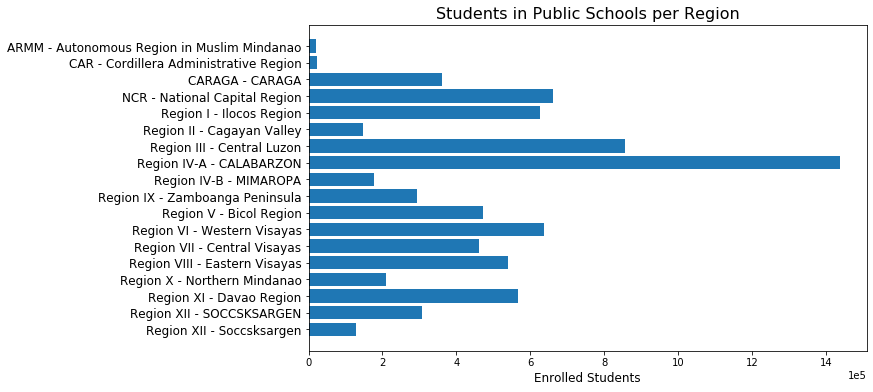

In [87]:
# indicates if plotting on the figues or on subplots
plt.figure(figsize=(10,6)) 

# the main code to create the graph
plt.barh(region.index, region.values) 

# additional elements that can be customzed
plt.title("Students in Public Schools per Region", fontsize=16)
plt.xlabel("Enrolled Students", fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.ticklabel_format(style='sci', axis='x', scilimits=(5,5))

# display graph
#plt.savefig("Viz1.png",  bbox_inches='tight')
plt.show();


2. Number of schools, teachers, and classroom in each district of Metro Manila. The dataset has been prepared for you.

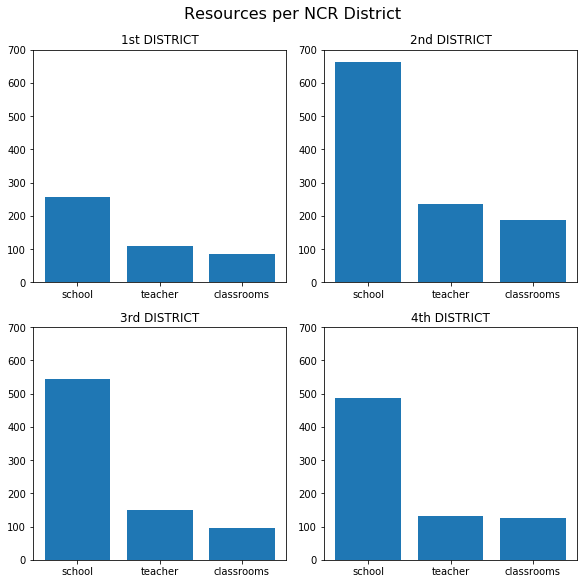

*Hint: figsize=8,8; title fontsize=16*

In [78]:
ncr = df[df["region"]=="NCR - National Capital Region"]
ncr_district = (ncr.groupby(["province"])["school_id", "Total_Inst", "Rooms_used"]
                .agg(school=("school_id", len), 
                     teacher=("Total_Inst", max),
                     classrooms=("Rooms_used", max))
                .reset_index()
                .melt(id_vars=["province"])).set_index("province")
ncr_district

,variable,value
province,,
"Manila, Ncr, First District",school,256.0
Ncr Fourth District,school,488.0
Ncr Second District,school,664.0
Ncr Third District,school,544.0
"Manila, Ncr, First District",teacher,110.0
Ncr Fourth District,teacher,132.0
Ncr Second District,teacher,236.0
Ncr Third District,teacher,151.0
"Manila, Ncr, First District",classrooms,85.0


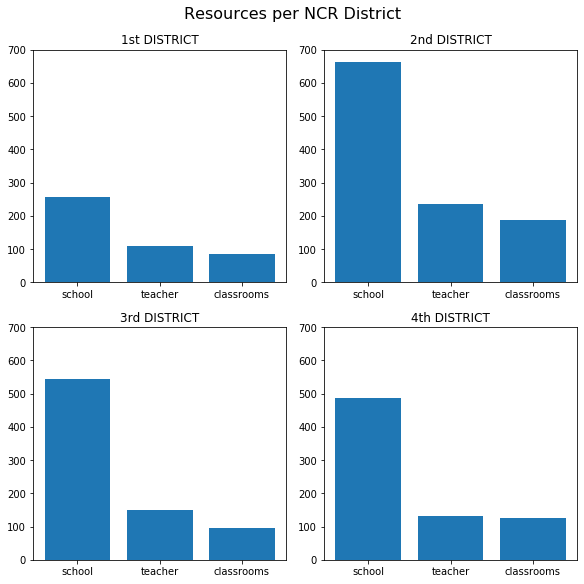

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8),  constrained_layout=True)

first = ncr_district.loc["Manila, Ncr, First District"]
second = ncr_district.loc["Ncr Second District"]
third = ncr_district.loc["Ncr Third District"]
fourth = ncr_district.loc["Ncr Fourth District"]

axes[0,0].bar(first["variable"], first["value"])
axes[0,0].set_title("1st DISTRICT")
axes[0,0].set_ylim(0,700)
axes[0,1].bar(second["variable"], second["value"])
axes[0,1].set_title("2nd DISTRICT")
axes[0,1].set_ylim(0,700)
axes[1,0].bar(third["variable"], third["value"])
axes[1,0].set_title("3rd DISTRICT")
axes[1,0].set_ylim(0,700)
axes[1,1].bar(fourth["variable"], fourth["value"])
axes[1,1].set_title("4th DISTRICT")
axes[1,1].set_ylim(0,700)

fig.suptitle('Resources per NCR District', fontsize=16)
#plt.savefig("Viz2.png",  bbox_inches='tight')
plt.show();